In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [118]:
results = Table.read("../data/batchfit_results.csv", format='ascii.ecsv')
results.sort("JD")

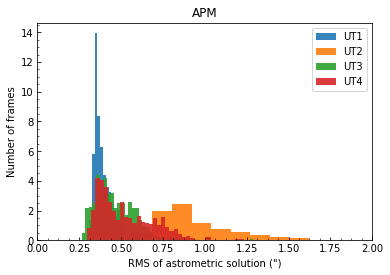

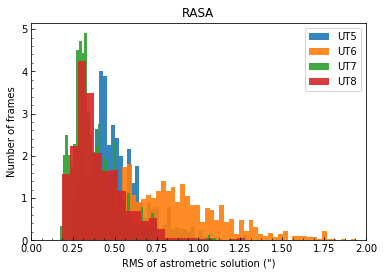

In [119]:
### APMs
for i in range(1, 5):
    temp_UT = results[results["UT"] == "UT%s" % i]
    plt.hist(temp_UT["RMS_AFT"], bins='stone', label = "UT%s" % i, density=True, alpha=0.9)
    plt.legend()
    plt.savefig("APMTubes2.png", bbox_inches='tight')
    plt.xlim(0, 2)
    plt.xlabel("RMS of astrometric solution (\")")
    plt.ylabel("Number of frames")
    plt.minorticks_on()
    plt.tick_params(axis='both', which='both', direction='in')
    plt.title("APM")
plt.show()
for i in range(5, 9):
    temp_UT = results[results["UT"] == "UT%s" % i]
    plt.hist(temp_UT["RMS_AFT"], bins='stone', label = "UT%s" % i, density=True, alpha=0.9)
    plt.legend()
    plt.title("RASA")
    plt.xlim(0, 2)
    plt.xlabel("RMS of astrometric solution (\")")
    plt.ylabel("Number of frames")
    plt.minorticks_on()
    plt.tick_params(axis='both', which='both', direction='in')
    plt.savefig("RASATubes2.png", bbox_inches='tight')

In [120]:
indiv_UT = results[results["UT"] == "UT2"]

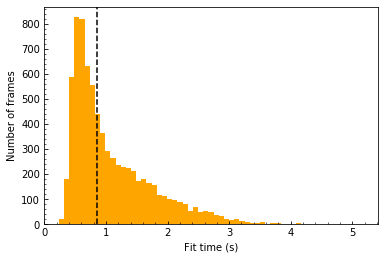

In [134]:
plt.hist(results["FITTIME"], bins='auto', color='orange')
plt.xlabel("Fit time (s)")
plt.ylabel("Number of frames")
plt.axvline(np.median(results["FITTIME"]), c='k', ls='--')
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in')
plt.savefig("solvetime_histogram.png", bbox_inches='tight', dpi=120)

In [127]:
## If it has a bad solution coming in we can't do too much about it
bad_astromnet = (results["RMS_BEF"] > 3)

### Excluding bad input sols, does my code make both the offset and rms of the frame far worse?
bad_mycode1 = (np.abs(results["MED_BEF"]) - np.abs(results["MED_AFT"]) < 0) & (results["RMS_BEF"] - results["RMS_AFT"] < 0) & ~bad_astromnet
print("Frames borked by refitting: %s" % np.sum(bad_mycode1))
print("%s%% of frames affected" % np.round((100*np.sum(bad_mycode1)/len(results)),2))

Frames borked by refitting: 0
0.0% of frames affected


In [129]:
100*(np.sum(bad_astromnet) / len(bad_astromnet))

0.07864726700747149

In [135]:
results

FNAME,UT,JD,MED_BEF,MED_AFT,RMS_BEF,RMS_AFT,CHI_BEF,CHI_AFT,FITTIME,XMATCHTIME,SRCDENS
str17,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
r0223126_UT1.fits,UT1,2458839.30807618,-0.04411959687828926,0.0017215295237349437,0.5321927440668541,0.47897388775536703,31505.065205908184,2656.951601495748,0.923,2.91,5741.0
r0223126_UT7.fits,UT7,2458839.30807618,-0.10652493265723706,0.0027703619110752697,0.5957217904582882,0.29418336370827725,51962.27126850246,1809.1779268656578,1.272,16.217,10447.0
r0223126_UT6.fits,UT6,2458839.30807618,-0.13568269444306225,0.027266245901103048,1.0050962426631633,0.987324834526726,48947.69073630012,15469.054870927723,1.143,8.354,7919.0
r0223126_UT5.fits,UT5,2458839.30807618,0.15264488159871803,-0.025705865986225263,0.400584355705897,0.37472243800273575,41987.03714920055,2189.889825420545,1.236,5.674,7713.0
r0223126_UT4.fits,UT4,2458839.30807618,-0.015230891926876211,-0.00437911242947564,0.3359154454835954,0.3282611438383894,16517.876254089326,1107.9792353997657,0.815,3.42,5140.0
r0223126_UT2.fits,UT2,2458839.30807618,-0.06286749509136769,0.03040660761577385,0.8932732143262128,0.8801697056016361,30526.467579943444,9846.227791588226,0.81,3.615,5482.0
r0223126_UT8.fits,UT8,2458839.30807618,-0.40909862254601137,0.019488966642100536,0.3268561688050692,0.2889050667659391,72234.0337627688,1503.7251722200697,0.93,2.608,8988.0
r0223126_UT3.fits,UT3,2458839.30807618,-0.21741719388046477,0.0009363609279944285,0.5990052486044464,0.5883323144907797,28127.69047360016,3989.0932506270447,0.866,4.754,5519.0
r0223127_UT3.fits,UT3,2458839.308848226,-0.22348387770136924,0.003332421282919995,0.5545901078718978,0.5474895804960904,26989.584352575956,3543.6639773374723,0.864,4.372,5558.0
